In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from pycaret.classification import *

In [2]:
df=pd.read_csv('D:/SIFAI/Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
le=LabelEncoder()

In [5]:
df['label']=le.fit_transform(df['label'])

In [6]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [7]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.duplicated().value_counts()

False    2200
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 129.0 KB


In [10]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


In [11]:
s=setup(df,target='label')

,Description,Value
0,Session id,5253
1,Target,label
2,Target type,Multiclass
3,Original data shape,"(2200, 8)"
4,Transformed data shape,"(2200, 8)"
5,Transformed train set shape,"(1540, 8)"
6,Transformed test set shape,"(660, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [12]:
best_model=s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9961,1.0000,0.9961,0.9967,0.9961,0.9959,0.9960,0.0210
rf,Random Forest Classifier,0.9961,1.0000,0.9961,0.9966,0.9961,0.9959,0.9959,0.1000
qda,Quadratic Discriminant Analysis,0.9948,1.0000,0.9948,0.9953,0.9948,0.9946,0.9946,0.0190
et,Extra Trees Classifier,0.9935,0.9999,0.9935,0.9944,0.9935,0.9932,0.9932,0.0700
lightgbm,Light Gradient Boosting Machine,0.9903,0.9999,0.9903,0.9914,0.9902,0.9898,0.9899,3.6590
dt,Decision Tree Classifier,0.9877,0.9935,0.9877,0.9891,0.9876,0.9871,0.9872,0.0170
gbc,Gradient Boosting Classifier,0.9844,1.0000,0.9844,0.9872,0.9846,0.9837,0.9838,1.6120
knn,K Neighbors Classifier,0.9786,0.9981,0.9786,0.9814,0.9783,0.9776,0.9777,0.4690
lr,Logistic Regression,0.9695,0.9995,0.9695,0.9725,0.9690,0.9680,0.9682,0.7080
lda,Linear Discriminant Analysis,0.9643,0.9997,0.9643,0.9720,0.9640,0.9626,0.9630,0.0180


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [13]:
s.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

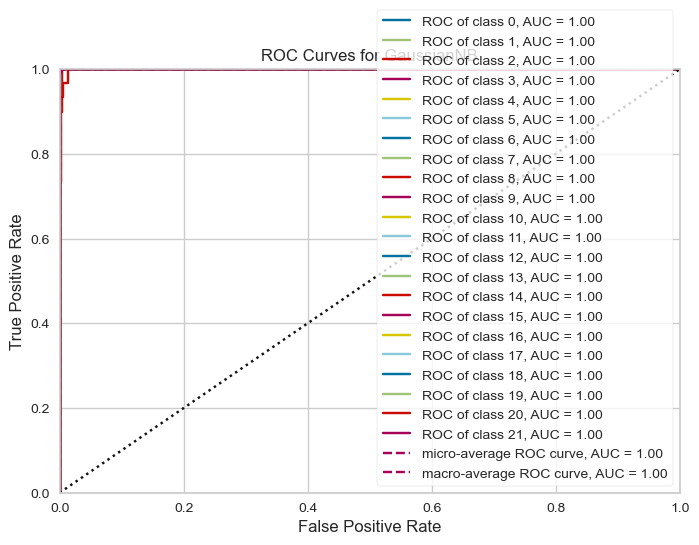

In [14]:
s.plot_model(best_model,plot='auc')

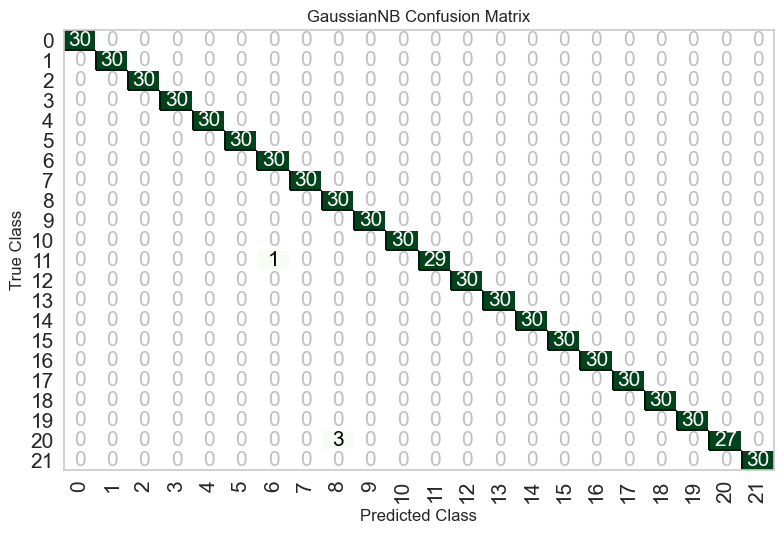

In [15]:
s.plot_model(best_model,plot='confusion_matrix')

In [16]:
s.predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9939,0.9999,0.9939,0.9944,0.9939,0.9937,0.9937


,N,P,K,temperature,humidity,ph,rainfall,label,prediction_label,prediction_score
564,22,36,16,30.581394,50.771481,8.184229,64.585594,13,13,1.0000
1633,15,14,8,10.010813,90.223991,6.220943,119.394104,16,16,1.0000
683,24,44,17,29.859692,80.034996,6.666380,50.664875,14,14,0.9998
1684,7,17,10,10.164313,91.223213,6.465913,106.362549,16,16,1.0000
1336,119,7,55,26.038677,84.637840,6.031425,44.399338,21,21,1.0000
...,...,...,...,...,...,...,...,...,...,...
405,30,75,25,30.332766,42.352497,6.446092,149.299957,18,18,1.0000
1282,1,132,200,16.278528,82.942703,5.620746,66.574631,7,7,1.0000
361,24,67,22,20.120043,22.898457,5.618845,104.625214,9,9,0.9997
99,65,37,40,23.359055,83.595123,5.333323,188.413666,20,20,0.9714


In [17]:
predictions = s.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9955,1.0000,0.9955,0.9956,0.9955,0.9952,0.9952


In [18]:
predictions.head()

,N,P,K,temperature,humidity,ph,rainfall,label,prediction_label,prediction_score
0,90,42,43,20.879744,82.002747,6.502985,202.935532,20,20,0.9890
1,85,58,41,21.770462,80.319641,7.038096,226.655533,20,20,0.9994
2,60,55,44,23.004459,82.320763,7.840207,263.964233,20,20,1.0000
3,74,35,40,26.491096,80.158363,6.980401,242.864029,20,20,0.9997
4,78,42,42,20.130175,81.604874,7.628473,262.717346,20,20,1.0000


In [19]:
s.save_model(best_model, 'seedai_cyp')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['N', 'P', 'K', 'temperature',
                                              'humidity', 'ph', 'rainfall'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                   

In [20]:
loaded_model = load_model('seedai_cyp')

Transformation Pipeline and Model Successfully Loaded


In [21]:
loaded_model

Pipeline(memory=FastMemory(location=C:\Users\shaik\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['N', 'P', 'K', 'temperature',
                                             'humidity', 'ph', 'rainfall'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)